In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}

headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [3]:
type(data)


dict

In [4]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [21]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9865,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19226200.00000,19226200.00000,NaN,1,NaN,NaN,None,2022-12-06T23:38:00.000Z,17089.68407,19748092037.82804,-11.32600,0.54322,0.68928,3.81971,-18.50775,-12.55744,-11.51098,328569683884.17706,38.37350,358883365489.15997,None,2022-12-06T23:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 23:49:52.017078
1,1027,Ethereum,ETH,ethereum,6261,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2022-12-06T23:38:00.000Z,1270.46703,5034799001.79359,-18.04120,1.20479,0.85795,4.26701,-19.50291,-4.73700,-22.40000,155471962971.08484,18.15750,155471962971.07999,None,2022-12-06T23:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 23:49:52.017078
2,825,Tether,USDT,tether,44211,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65576715611.09682,73141766321.23428,NaN,3,NaN,NaN,None,2022-12-06T23:38:00.000Z,1.00007,25436881635.41221,-11.62100,-0.00046,-0.00143,0.03292,-0.00420,-0.00793,-0.00112,65581105760.45090,7.65920,73146662926.30000,None,2022-12-06T23:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-06 23:49:52.017078
3,1839,BNB,BNB,bnb,1149,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159969329.40484,159979963.59043,NaN,4,NaN,NaN,None,2022-12-06T23:38:00.000Z,290.47007,607315223.25178,-14.09720,0.52135,0.75947,-2.18425,-15.52099,2.85717,4.44231,46466302869.37989,5.42680,58094014699.26000,None,2022-12-06T23:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 23:49:52.017078
4,3408,USD Coin,USDC,usd-coin,8715,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43027922117.11496,43027922117.11496,NaN,5,NaN,NaN,None,2022-12-06T23:38:00.000Z,1.00015,2196408624.40700,-4.22880,0.01489,0.00564,0.00424,0.02429,0.01817,0.02013,43034247892.36634,5.02250,43034247892.37000,None,2022-12-06T23:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-06 23:49:52.017078
5,4687,Binance USD,BUSD,binance-usd,5684,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,22100085744.15442,22100085744.15442,NaN,6,NaN,NaN,None,2022-12-06T23:38:00.000Z,1.00032,5536174047.87774,-6.14850,0.03607,0.00325,0.01122,0.04730,0.03733,0.01408,22107114297.60392,2.58010,22107114297.60000,None,2022-12-06T23:38:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-12-06 23:49:52.017078
6,52,XRP,XRP,xrp,854,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50260446248.00000,99989199669.00000,NaN,7,NaN,NaN,None,2022-12-06T23:38:00.000Z,0.39215,815059768.28138,-8.16920,0.51210,0.76730,-1.60990,-16.81589,-24.01261,16.04136,19709618833.65932,2.30030,39214969832.15000,None,2022-12-06T23:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 23:49:52.017078
7,74,Dogecoin,DOGE,dogecoin,608,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,NaN,8,NaN,NaN,None,2022-12-06T23:38:00.000Z,0.10026,532263427.37624,-49.34920,0.74422,-1.01245,-1.71249,-12.35399,60.88416,63.73237,13301520029.74275,1.55350,13301520029.74000,None,2022-12-06T23:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 23:49:52.01

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df 
    
    if not os.path.isfile(r'C:\\Users\\AHMED\\OneDrive\\Documents\\Python Script\\API.csv'):
        df.to_csv(r'C:\\Users\\AHMED\OneDrive\\Documents\\Python Script\\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\\Users\\AHMED\\OneDrive\\Documents\\Python Script\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

In [7]:
import os 
from time import time
from time import sleep

for i in range(5):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
('Connection aborted.', TimeoutError(10060, 'A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond', None, 10060, None))


UnboundLocalError: local variable 'data' referenced before assignment

In [8]:
df7 = pd.read_csv(r'C:\\Users\\AHMED\\OneDrive\\Documents\\Python Script\API.csv')
df7

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,9865,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.922620e+07,1.922620e+07,NaN,1,NaN,NaN,NaN,2022-12-06T22:41:00.000Z,16995.796035,1.856677e+10,-17.1881,0.014316,1.282434e-01,3.138902,-19.511952,-13.145424,-12.124313,3.267646e+11,38.3524,3.569117e+11,NaN,2022-12-06T22:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 22:45:02.758922
1,1,1027,Ethereum,ETH,ethereum,6261,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2022-12-06T22:41:00.000Z,1255.089648,4.690521e+09,-24.5861,0.063587,-4.027009e-01,2.944918,-21.429707,-5.919225,-23.511608,1.535902e+11,18.0269,1.535902e+11,NaN,2022-12-06T22:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 22:45:02.758922
2,2,825,Tether,USDT,tether,44211,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.557672e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2022-12-06T22:41:00.000Z,1.000065,2.427624e+10,-15.9596,-0.000791,-4.803000e-04,0.035003,-0.000579,-0.007051,-0.001934,6.558099e+10,7.6973,7.314653e+10,NaN,2022-12-06T22:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-06 22:45:02.758922
3,3,1839,BNB,BNB,bnb,1149,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.599693e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2022-12-06T22:41:00.000Z,288.964064,5.858964e+08,-17.8009,0.037441,1.724890e-01,-2.606794,-17.081433,2.093154,3.982199,4.622539e+10,5.4255,5.779281e+10,NaN,2022-12-06T22:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 22:45:02.758922
4,4,3408,USD Coin,USDC,usd-coin,8714,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.302792e+10,4.302792e+10,NaN,5,NaN,NaN,NaN,2022-12-06T22:41:00.000Z,1.000019,2.157532e+09,-6.7572,-0.003992,9.577780e-03,-0.012246,0.019374,-0.005444,0.019069,4.302874e+10,5.0498,4.302874e+10,NaN,2022-12-06T22:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-06 22:45:02.758922
5,5,4687,Binance USD,BUSD,binance-usd,5684,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,2.210009e+10,2.210009e+10,NaN,6,NaN,NaN,NaN,2022-12-06T22:41:00.000Z,0.999932,5.391695e+09,-9.4240,-0.016756,-2.300000e-07,-0.035389,0.026720,0.002994,-0.017438,2.209858e+10,2.5934,2.209858e+10,NaN,2022-12-06T22:41:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-12-06 22:45:02.758922
6,6,52,XRP,XRP,xrp,854,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.026045e+10,9.998920e+10,NaN,7,NaN,NaN,NaN,2022-12-06T22:41:00.000Z,0.390116,8.140986e+08,-7.7610,0.037213,2.231466e-01,-2.043570,-18.506180,-24.848400,15.942055,1.960742e+10,2.3011,3.901163e+10,NaN,2022-12-06T22:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 22:45:02.758922
7,7,74,Dogecoin,DOGE,dogecoin,608,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,NaN,2022-12-06T22:41:00.000Z,0.099527,5.211349e+08,-50.7638,0.026212,-1.597946e+00,-2.638257,-16.073737,59.999556,62.936001,1.320436e+10,1.5498,1.320436e+10,NaN,2022-12-06T22:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 22:45:02.758922
8,8,2010,Cardano,ADA,cardano,604,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,9865,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19226200.00000,19226200.00000,NaN,1,NaN,NaN,None,2022-12-06T23:40:00.000Z,17088.32232,19746082126.23243,-11.30460,0.54213,0.64274,3.81660,-18.46963,-12.53837,-11.50426,328543502641.67413,38.33660,358854768777.77002,None,2022-12-06T23:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 23:44:10.373270
1,1027,Ethereum,ETH,ethereum,6261,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2022-12-06T23:40:00.000Z,1270.60731,5038948423.36404,-17.96420,1.22275,0.84047,4.31193,-19.42676,-4.68869,-22.37026,155489129001.85611,18.14350,155489129001.85999,None,2022-12-06T23:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 23:44:10.373270
2,825,Tether,USDT,tether,44211,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65576715611.09682,73141766321.23428,NaN,3,NaN,NaN,None,2022-12-06T23:40:00.000Z,1.00006,25430120910.60838,-11.62270,-0.00211,-0.00186,0.03235,-0.00467,-0.00948,-0.00507,65580367958.48972,7.65230,73145840010.14999,None,2022-12-06T23:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-06 23:44:10.373270
3,1839,BNB,BNB,bnb,1149,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159969329.40484,159979963.59043,NaN,4,NaN,NaN,None,2022-12-06T23:40:00.000Z,290.56286,607573292.82816,-14.02570,0.55059,0.76063,-2.15450,-15.41962,2.90539,4.48891,46481146663.55170,5.42370,58112572999.44000,None,2022-12-06T23:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 23:44:10.373270
4,3408,USD Coin,USDC,usd-coin,8715,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43027922117.11496,43027922117.11496,NaN,5,NaN,NaN,None,2022-12-06T23:40:00.000Z,1.00006,2198014219.68350,-4.16400,0.00329,-0.00346,-0.00207,0.02301,0.01260,0.01779,43030521035.41199,5.02210,43030521035.41000,None,2022-12-06T23:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-06 23:44:10.373270
5,4687,Binance USD,BUSD,binance-usd,5684,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,22100085744.15442,22100085744.15442,NaN,6,NaN,NaN,None,2022-12-06T23:40:00.000Z,1.00064,5540127357.16901,-6.01820,0.06874,0.03416,0.08065,0.01919,0.03878,0.04626,22114260096.88718,2.58090,22114260096.89000,None,2022-12-06T23:40:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-12-06 23:44:10.373270
6,52,XRP,XRP,xrp,854,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50260446248.00000,99989199669.00000,NaN,7,NaN,NaN,None,2022-12-06T23:40:00.000Z,0.39225,815105425.52929,-8.17000,0.54722,0.72918,-1.57891,-16.73605,-24.04959,16.11057,19714820718.50791,2.30090,39225319690.22000,None,2022-12-06T23:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 23:44:10.373270
7,74,Dogecoin,DOGE,dogecoin,608,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,NaN,8,NaN,NaN,None,2022-12-06T23:40:00.000Z,0.10040,532493574.21865,-49.24980,0.88115,-0.89158,-1.57373,-11.65521,61.08690,63.96086,13319868545.50967,1.55420,13319868545.51000,None,2022-12-06T23:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 23:44:10.

In [11]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.54213,0.64274,3.81660,-18.46963,-12.53837,-11.50426
Ethereum,1.22275,0.84047,4.31193,-19.42676,-4.68869,-22.37026
Tether,-0.00211,-0.00186,0.03235,-0.00467,-0.00948,-0.00507
BNB,0.55059,0.76063,-2.15450,-15.41962,2.90539,4.48891
USD Coin,0.00329,-0.00346,-0.00207,0.02301,0.01260,0.01779
Binance USD,0.06874,0.03416,0.08065,0.01919,0.03878,0.04626
XRP,0.54722,0.72918,-1.57891,-16.73605,-24.04959,16.11057
Dogecoin,0.88115,-0.89158,-1.57373,-11.65521,61.08690,63.96086
Cardano,0.69681,-0.38112,2.77002,-21.18218,-24.94004,-33.74637


In [12]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.54213
             quote.USD.percent_change_24h     0.64274
             quote.USD.percent_change_7d      3.81660
             quote.USD.percent_change_30d   -18.46963
             quote.USD.percent_change_60d   -12.53837
             quote.USD.percent_change_90d   -11.50426
Ethereum     quote.USD.percent_change_1h      1.22275
             quote.USD.percent_change_24h     0.84047
             quote.USD.percent_change_7d      4.31193
             quote.USD.percent_change_30d   -19.42676
             quote.USD.percent_change_60d    -4.68869
             quote.USD.percent_change_90d   -22.37026
Tether       quote.USD.percent_change_1h     -0.00211
             quote.USD.percent_change_24h    -0.00186
             quote.USD.percent_change_7d      0.03235
             quote.USD.percent_change_30d    -0.00467
             quote.USD.percent_change_60d    -0.00948
             quote.USD.percent_change_90

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.54213
            quote.USD.percent_change_24h   0.64274
            quote.USD.percent_change_7d    3.81660
            quote.USD.percent_change_30d -18.46963
            quote.USD.percent_change_60d -12.53837
            quote.USD.percent_change_90d -11.50426
Ethereum    quote.USD.percent_change_1h    1.22275
            quote.USD.percent_change_24h   0.84047
            quote.USD.percent_change_7d    4.31193
            quote.USD.percent_change_30d -19.42676
            quote.USD.percent_change_60d  -4.68869
            quote.USD.percent_change_90d -22.37026
Tether      quote.USD.percent_change_1h   -0.00211
            quote.USD.percent_change_24h  -0.00186
            quote.USD.percent_change_7d    0.03235
            quote.USD.percent_change_30d  -0.00467
            quote.USD.percent_change_60d  -0.00948
            quote.USD.percent_change_90d  -0.00507
BNB         quote.USD.percent_change_1h    0.55059
            quote.USD.percent_change_24h   0.76063
            quote.USD.percent_change_7d   -2.15450
            quote.USD.percent_change_30d -15.41962
            quote.USD.percent_change_60d   2.90539
            quote.USD.percent_change_90d   4.48891
USD Coin    quote.USD.percent_change_1h    0.00329
            quote.USD.percent_change_24h  -0.00346
            quote.USD.percent_change_7d   -0.00207
            quote.USD.percent_change_30d   0.02301
            quote.USD.percent_change_60d   0.01260
            quote.USD.percent_change_90d   0.01779
Binance USD quote.USD.percent_change_1h    0.06874
            quote.USD.percent_change_24h   0.03416
            quote.USD.percent_change_7d    0.08065
            quote.USD.percent_change_30d   0.01919
            quote.USD.percent_change_60d   0.03878
            quote.USD.percent_change_90d   0.04626
XRP         quote.USD.percent_change_1h    0.54722
            quote.USD.percent_change_24h   0.72918
            quote.USD.percent_change_7d   -1.57891
            quote.USD.percent_change_30d -16.73605
            quote.USD.percent_change_60d -24.04959
            quote.USD.percent_change_90d  16.11057
Dogecoin    quote.USD.percent_change_1h    0.88115
            quote.USD.percent_change_24h  -0.89158
            quote.USD.percent_change_7d   -1.57373
            quote.USD.percent_change_30d -11.65521
            quote.USD.percent_change_60d  61.08690
            quote.USD.percent_change_90d  63.96086
Cardano     quote.USD.percent_change_1h    0.69681
            quote.USD.percent_change_24h  -0.38112
            quote.USD.percent_change_7d    2.77002
            quote.USD.percent_change_30d -21.18218
            quote.USD.percent_change_60d -24.94004
            quote.USD.percent_change_90d -33.74637
Polygon     quote.USD.percent_change_1h    1.26629
            quote.USD.percent_change_24h   0.74763
            quote.USD.percent_change_7d    9.07357
            quote.USD.percent_change_30d -19.94334
            quote.USD.percent_change_60d  10.15190
            quote.USD.percent_change_90d   8.69841
Polkadot    quote.USD.percent_change_1h    0.73240
            quote.USD.percent_change_24h   0.33655
            quote.USD.percent_change_7d    3.53200
            quote.USD.percent_change_30d -19.27909
            quote.USD.percent_change_60d -12.97661
            quote.USD.percent_change_90d -23.76133
Dai         quote.USD.percent_change_1h    0.02272
            quote.USD.percent_change_24h  -0.02796
            quote.USD.percent_change_7d    0.00500
            quote.USD.percent_change_30d   0.09651
            quote.USD.percent_change_60d   0.06472
            quote.USD.percent_change_90d  -0.01374
Litecoin    quote.USD.percent_change_1h    1.26136
            quote.USD.percent_change_24h  -0.72946
            quote.USD.percent_change_7d    4.31304
            quote.USD.percent_change_30d  16.90876
            quote.USD.percent_change_60d  50.63770
            quo

In [14]:
df5.count()


values    90
dtype: int64

In [15]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.54213
1,Bitcoin,quote.USD.percent_change_24h,0.64274
2,Bitcoin,quote.USD.percent_change_7d,3.81660
3,Bitcoin,quote.USD.percent_change_30d,-18.46963
4,Bitcoin,quote.USD.percent_change_60d,-12.53837
5,Bitcoin,quote.USD.percent_change_90d,-11.50426
6,Ethereum,quote.USD.percent_change_1h,1.22275
7,Ethereum,quote.USD.percent_change_24h,0.84047
8,Ethereum,quote.USD.percent_change_7d,4.31193
9,Ethereum,quote.USD.percent_change_30d,-19.42676


In [16]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.54213
1,Bitcoin,quote.USD.percent_change_24h,0.64274
2,Bitcoin,quote.USD.percent_change_7d,3.81660
3,Bitcoin,quote.USD.percent_change_30d,-18.46963
4,Bitcoin,quote.USD.percent_change_60d,-12.53837
5,Bitcoin,quote.USD.percent_change_90d,-11.50426
6,Ethereum,quote.USD.percent_change_1h,1.22275
7,Ethereum,quote.USD.percent_change_24h,0.84047
8,Ethereum,quote.USD.percent_change_7d,4.31193
9,Ethereum,quote.USD.percent_change_30d,-19.42676


In [17]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7


,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.54213
1,Bitcoin,24h,0.64274
2,Bitcoin,7d,3.81660
3,Bitcoin,30d,-18.46963
4,Bitcoin,60d,-12.53837
5,Bitcoin,90d,-11.50426
6,Ethereum,quote.USD.percent_change_1h,1.22275
7,Ethereum,24h,0.84047
8,Ethereum,7d,4.31193
9,Ethereum,30d,-19.42676


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


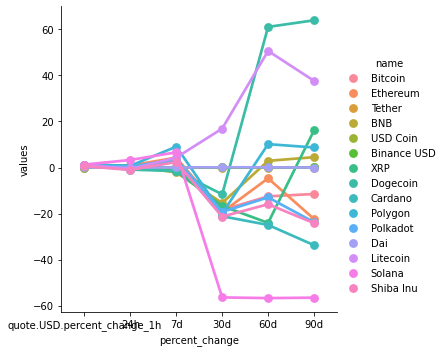

In [19]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')